In [84]:
from pandasql import sqldf
import pandas as pd
import instaloader
from instaloader import Instaloader, Profile
import time
def query(q):
    return sqldf(q, globals())

import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
tiyatro = pd.read_csv('theater_play.csv')

In [13]:
q = """
select * from tiyatro
"""
query(q)

,PLAY_DATE,PLAY_NAME,THEATER_NAME,PLAY_CATEGORY,IS_GUEST_PLAY,PLAY_TYPE,LONGITUDE,LATITUDE,NUMBER_OF_AUDIENCE
0,2017-12-27,KARAGÖZ' ÜN UYKUSU,Gaziosmanpaşa Ferih Egemen Çocuk Tiyatrosu Sah...,Çocuk,0,Yerli,28.916482,41.057846,50
1,2017-11-30,BAK BİZİM ŞARKIMIZI ÇALIYORLAR,Kağıthane Sadabad Sahnesi,Müzikal,0,Yabancı,28.970972,41.079366,84
2,2019-01-17,KARINCALAR - BİR SAVAŞ VARDI,Sultangazi Hoca Ahmet Yesevi Sahnesi,Yetişkin,0,Yabancı,28.876578,41.097745,26
3,2018-05-22,DAMDAKİ KEMANCI (MEF ÜNİ. TİYATRO TOPLULUĞU),Üsküdar Musahipzade Celãl Sahnesi,Yetişkin,1,Yerli,29.012900,41.019561,64
4,2018-11-24,HAYAL-İ TEMSİL,Harbiye Muhsin Ertuğrul Sahnesi,Yetişkin,0,Yerli,28.988829,41.046788,52
...,...,...,...,...,...,...,...,...,...
27286,2020-02-18,BİZİM AİLE,Kağıthane Sadabad Sahnesi,Müzikal,0,Yerli,28.970972,41.079366,625
27287,2019-12-22,ELMA KURDU KIRTIK,Gaziosmanpaşa Ferih Egemen Çocuk Tiyatrosu Sah...,Çocuk,0,Yerli,28.916482,41.057846,18
27288,2019-12-03,BİSKÜVİ ADAM,Fatih Reşat Nuri Sahnesi,Çocuk,0,Yabancı,28.956194,41.015900,34
27289,2019-12-09,UZLAŞMA,Kadıköy Haldun Taner Sahnesi,Yetişkin,0,Yabancı,29.023408,40.991770,20


In [44]:
q = """
select * from (
select distinct THEATER_NAME, LONGITUDE, LATITUDE
from tiyatro
where 1=1
and substr(PLAY_DATE,1,4) not in ('2020','2019')
and substr(THEATER_NAME,1,4) not in ('BOZ,','ISTA','None')
limit 12) where substr(THEATER_NAME,1,21) not in ('Kağıthane Küçük Kemal','Gaziosmanpaşa Ferih E')
"""
sahneler = query(q)

In [45]:
sahneler

,THEATER_NAME,LONGITUDE,LATITUDE
0,Kağıthane Sadabad Sahnesi,28.970972,41.079366
1,Üsküdar Musahipzade Celãl Sahnesi,29.012900,41.019561
2,Harbiye Muhsin Ertuğrul Sahnesi,28.988829,41.046788
3,Üsküdar Kerem Yılmazer Sahnesi,29.023817,41.017064
4,Fatih Reşat Nuri Sahnesi,28.956194,41.015900
5,Ümraniye Sahnesi,29.104798,41.025025
6,Gaziosmanpaşa Sahnesi,28.916482,41.057846
7,Kadıköy Haldun Taner Sahnesi,29.023408,40.991770
8,Harbiye Cemil Topuzlu Açıkhava Sahnesi,28.990440,41.045777
9,Sultangazi Hoca Ahmet Yesevi Sahnesi,28.876578,41.097745


In [58]:
q = """
select substr(PLAY_DATE,1,4) as year,
substr(PLAY_DATE,6,2) as month, 
sum(NUMBER_OF_AUDIENCE) as talep
from tiyatro a
left join sahneler b on a.LONGITUDE=b.LONGITUDE and a.LATITUDE=b.LATITUDE
where 1=1
group by 1,2
order by 1,2
"""
query(q)

,year,month,sum(NUMBER_OF_AUDIENCE)
0,2017,09,28820
1,2017,10,88582
2,2017,11,79011
3,2017,12,92254
4,2018,01,96745
5,2018,02,76534
6,2018,03,85632
7,2018,04,28608
8,2018,05,20458
9,2018,06,2239


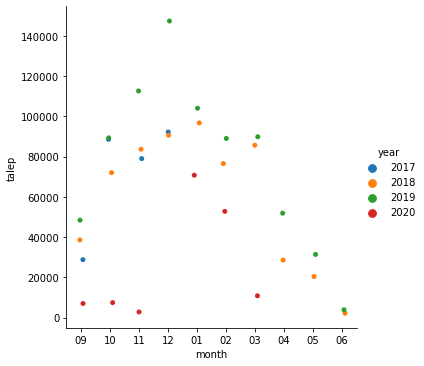

In [63]:
q = """
select substr(PLAY_DATE,1,4) as year,
substr(PLAY_DATE,6,2) as month, 
sum(NUMBER_OF_AUDIENCE) as talep
from tiyatro a
left join sahneler b on a.LONGITUDE=b.LONGITUDE and a.LATITUDE=b.LATITUDE
where 1=1
group by 1,2
order by 1,2
"""
query(q)
sns.catplot(x="month", y="talep",hue="year", data=query(q))

<AxesSubplot:xlabel='month', ylabel='talep'>

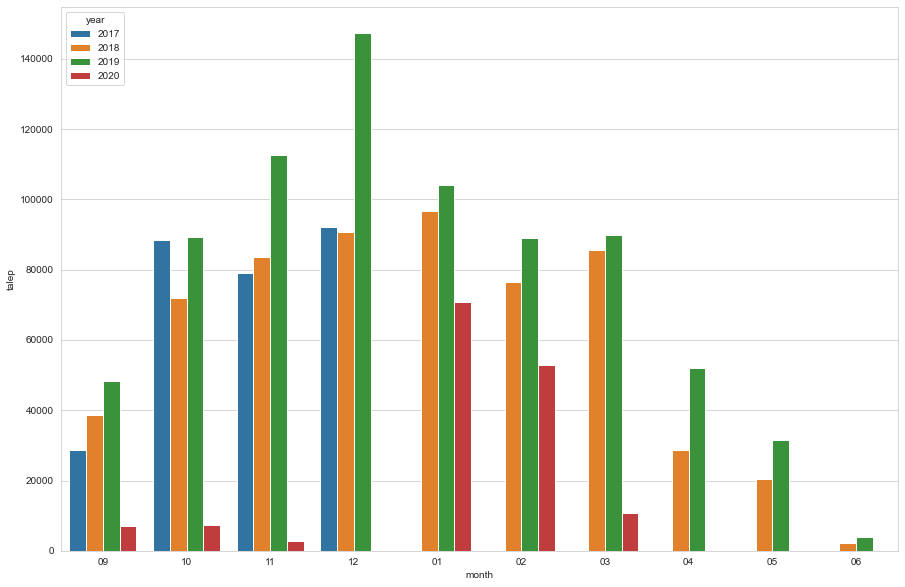

In [132]:
q = """
select substr(PLAY_DATE,1,4) as year,
substr(PLAY_DATE,6,2) as month,
PLAY_CATEGORY,
sum(NUMBER_OF_AUDIENCE) as talep
from tiyatro a
left join sahneler b on a.LONGITUDE=b.LONGITUDE and a.LATITUDE=b.LATITUDE
where 1=1
group by 1,2
order by 1,2
"""
query(q)

sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x=query(q)['month'],
            y=query(q)['talep'],
            hue=query(q)['year'],
            data=query(q),
            ci=None
            #estimator=scalar
            #palettepalette=query(q)['yearmonth']
           )


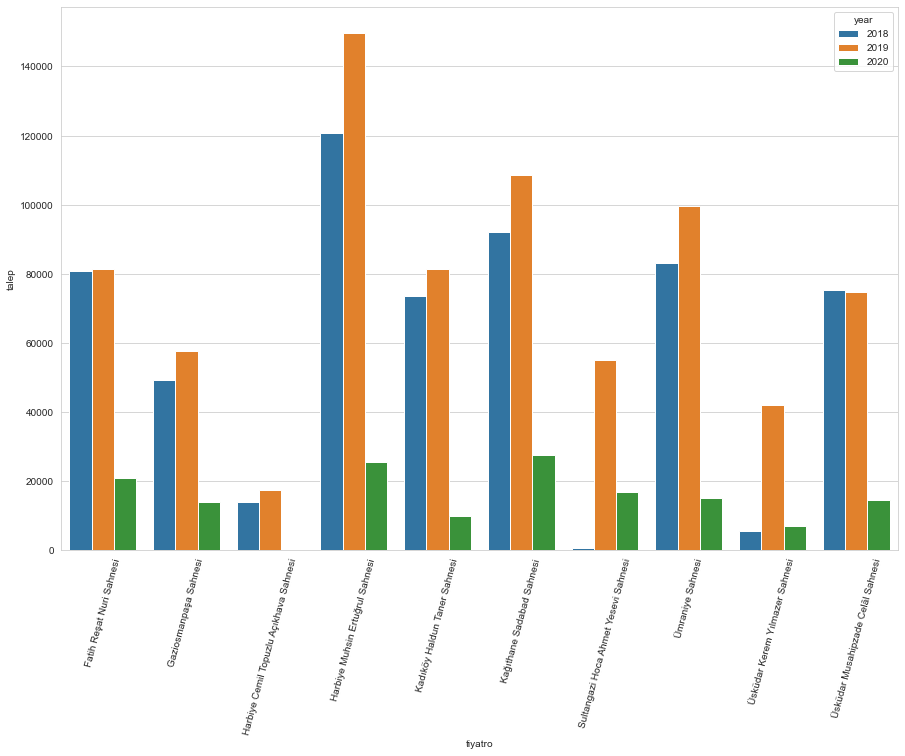

In [133]:
q = """
select substr(PLAY_DATE,1,4) as year,
b.THEATER_NAME as tiyatro,
sum(NUMBER_OF_AUDIENCE) as talep
from tiyatro a
left join sahneler b on a.LONGITUDE=b.LONGITUDE and a.LATITUDE=b.LATITUDE
where 1=1
and substr(PLAY_DATE,1,4) <> '2017'
group by 1,2
order by 1,2
"""
query(q)

sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x=query(q)['tiyatro'],
            y=query(q)['talep'],
            hue=query(q)['year'],
            data=query(q),
            ci=None
            #estimator=scalar
            #palettepalette=query(q)['yearmonth']
           )
plt.xticks(rotation= 75);


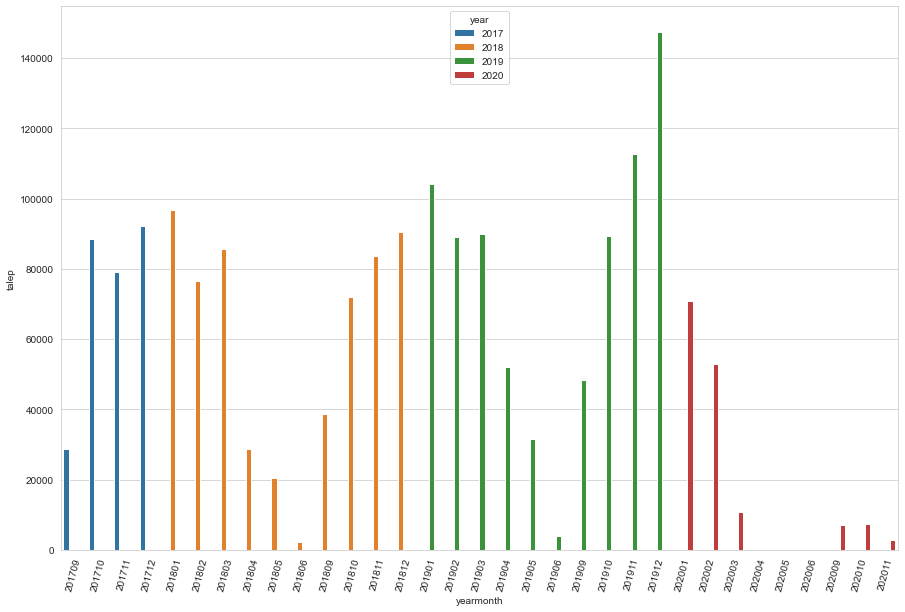

In [134]:
q = """
select * from (
select * from (
select substr(PLAY_DATE,1,4) || substr(PLAY_DATE,6,2) as yearmonth,
substr(PLAY_DATE,1,4) as year,
sum(NUMBER_OF_AUDIENCE) as talep
from tiyatro a
left join sahneler b on a.LONGITUDE=b.LONGITUDE and a.LATITUDE=b.LATITUDE
where 1=1
group by 1,2
order by 1,2)
union all select '202004' as yearmonth, '2020' as year, 0 as talep
union all select '202005' as yearmonth, '2020' as year, 0 as talep
union all select '202006' as yearmonth, '2020' as year, 0 as talep)
order by 1
"""
query(q)

sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x=query(q)['yearmonth'],
            y=query(q)['talep'],
            hue=query(q)['year'],
            data=query(q),
            ci=None
            #estimator=scalar
            #palettepalette=query(q)['yearmonth']
           )
plt.xticks(rotation= 75);


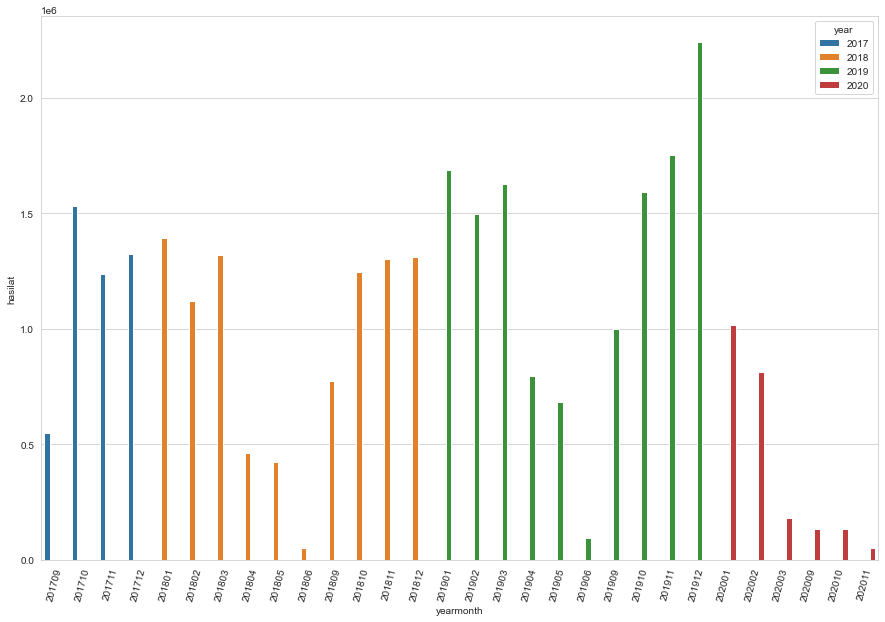

In [135]:
q = """
select yearmonth, year, sum(talep*bilet_fiyati) as hasilat from (
select substr(PLAY_DATE,1,4) || substr(PLAY_DATE,6,2) as yearmonth,
substr(PLAY_DATE,1,4) as year,
PLAY_TYPE as tiyatro,
NUMBER_OF_AUDIENCE as talep,
case 
when PLAY_CATEGORY = 'Yetişkin' and substr(PLAY_DATE,1,4) in ('2020','2019') then 20
when PLAY_CATEGORY = 'Müzikal' and substr(PLAY_DATE,1,4) in ('2020','2019') then 27
when PLAY_CATEGORY = 'Çocuk' and substr(PLAY_DATE,1,4) in ('2020','2019') then 5
when PLAY_CATEGORY = 'Yetişkin' and substr(PLAY_DATE,1,4) = '2018' then 18
when PLAY_CATEGORY = 'Müzikal' and substr(PLAY_DATE,1,4) = '2018' then 24
when PLAY_CATEGORY = 'Çocuk' and substr(PLAY_DATE,1,4) = '2018' then 5
when PLAY_CATEGORY = 'Yetişkin' and substr(PLAY_DATE,1,4) = '2017' then 18
when PLAY_CATEGORY = 'Müzikal' and substr(PLAY_DATE,1,4) = '2017' then 22
when PLAY_CATEGORY = 'Çocuk' and substr(PLAY_DATE,1,4) = '2017' then 5 end as bilet_fiyati
from tiyatro)
group by 1
order by 1
"""
query(q)


sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x=query(q)['yearmonth'],
            y=query(q)['hasilat'],
            hue=query(q)['year'],
            data=query(q),
            ci=None
            #estimator=scalar
            #palettepalette=query(q)['yearmonth']
           )
plt.xticks(rotation= 75);

In [140]:
q = """
select year, sum(talep*bilet_fiyati) as hasilat from (
select substr(PLAY_DATE,1,4) || substr(PLAY_DATE,6,2) as yearmonth,
substr(PLAY_DATE,1,4) as year,
PLAY_TYPE as tiyatro,
NUMBER_OF_AUDIENCE as talep,
case 
when PLAY_CATEGORY = 'Yetişkin' and substr(PLAY_DATE,1,4) in ('2020','2019') then 20
when PLAY_CATEGORY = 'Müzikal' and substr(PLAY_DATE,1,4) in ('2020','2019') then 27
when PLAY_CATEGORY = 'Çocuk' and substr(PLAY_DATE,1,4) in ('2020','2019') then 5
when PLAY_CATEGORY = 'Yetişkin' and substr(PLAY_DATE,1,4) = '2018' then 18
when PLAY_CATEGORY = 'Müzikal' and substr(PLAY_DATE,1,4) = '2018' then 24
when PLAY_CATEGORY = 'Çocuk' and substr(PLAY_DATE,1,4) = '2018' then 5
when PLAY_CATEGORY = 'Yetişkin' and substr(PLAY_DATE,1,4) = '2017' then 18
when PLAY_CATEGORY = 'Müzikal' and substr(PLAY_DATE,1,4) = '2017' then 22
when PLAY_CATEGORY = 'Çocuk' and substr(PLAY_DATE,1,4) = '2017' then 5 end as bilet_fiyati
from tiyatro)
where yearmonth = '201912'
group by 1
order by 1
"""
query(q)


,year,hasilat
0,2019,2241775
